# Análise Exploratória dos Dados

In [83]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
data_path = 'dataset'
files = [x for x in os.listdir(data_path) if x.endswith('.csv')]
files

['BD_SERVICOS.csv', 'BD_CONSUMO.csv', 'BD_DEM_TIME.csv']

## Variáveis de Ambiente

In [3]:
ano_atual = 2021
ano_antigo = 1900

# BD_DEM_TIME.csv

In [106]:
df_bem_time = pd.read_csv(os.path.join(data_path, 'BD_DEM_TIME.csv'))
df_bem_time

,KEY,SEXO,DTA_NASC,ESTADO,TIME
0,2421280,M,1994.0,Minas Gerais,Cruzeiro
1,1604566,M,1990.0,Bahia,Flamengo
2,133472,M,1985.0,Rio de Janeiro,Botafogo
3,1069773,M,1989.0,Rio Grande do Sul,Gremio
4,2083240,M,1994.0,Sao Paulo,Santos
...,...,...,...,...,...
951459,2372668,M,1994.0,Rio Grande do Sul,Gremio
951460,1640963,M,1988.0,Sao Paulo,Sao Paulo
951461,810316,M,1982.0,Sao Paulo,Corinthians
951462,3113267,NaN,NaN,Rio de Janeiro,Botafogo


## Data de Nascimento

In [107]:
column = 'DTA_NASC'
mask = (df_bem_time[column]>ano_antigo) & (df_bem_time[column]<ano_atual)
df_bem_time.loc[~mask, column] = None # joga quem ta fora da data para None
df_bem_time['IDADE'] = ano_atual - df_bem_time[column]
df_bem_time = df_bem_time.drop(columns=[column])

## Idade

<AxesSubplot:title={'center':'IDADE'}, ylabel='Frequency'>

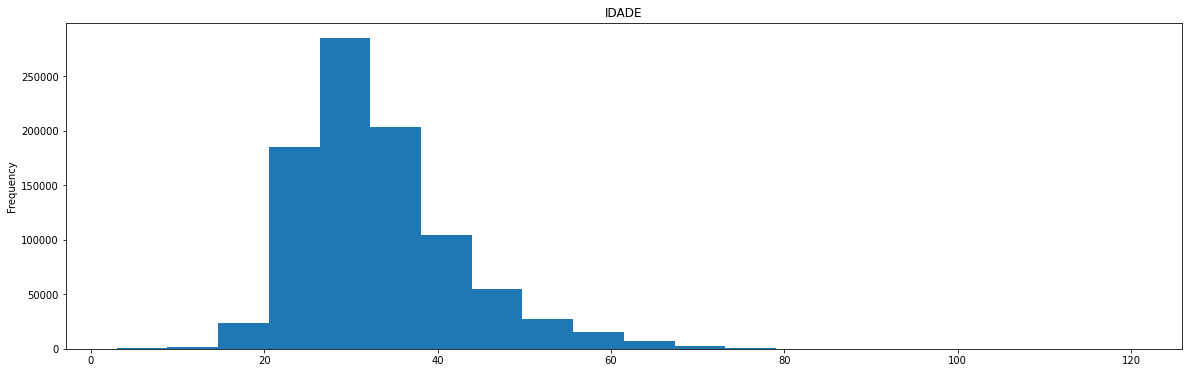

In [108]:
# Existem valores estranhos para Data de Nascimento
column='IDADE'
df_bem_time[column].plot.hist(figsize=(20, 6), title=column, bins=20)

In [112]:
df_bem_time.describe()

,KEY,IDADE
count,9.514640e+05,912526.000000
mean,1.708691e+06,33.298431
std,9.852548e+05,9.324710
min,3.000000e+00,3.000000
25%,8.548928e+05,27.000000
50%,1.709532e+06,32.000000
75%,2.562060e+06,38.000000
max,3.414422e+06,120.000000


In [111]:
# Quantidade de Idades Nulas
column='IDADE'
df_bem_time[column].isna().sum()

38938

## Sexo

In [113]:
column='SEXO'
mask = (df_bem_time[column] == 'M') | (df_bem_time[column] == 'F')
df_bem_time.loc[~mask, 'SEXO'] = None

<AxesSubplot:title={'center':'SEXO'}>

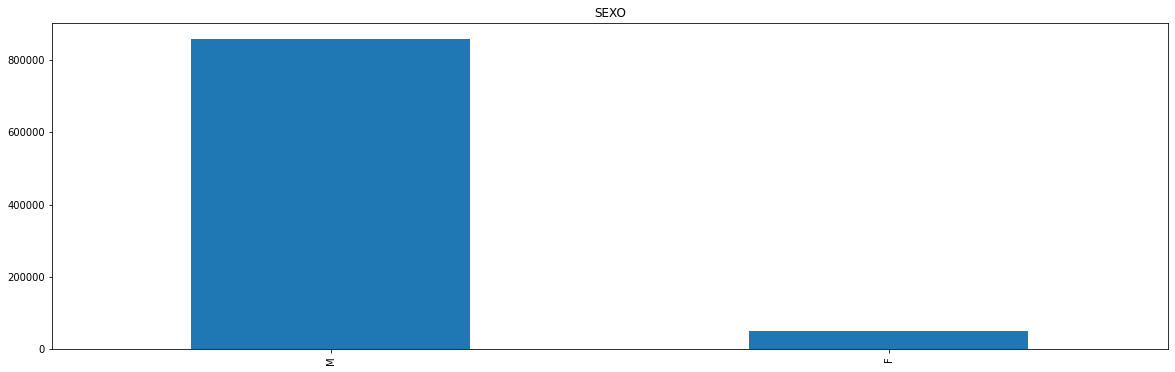

In [124]:
df_bem_time[column].value_counts().plot.bar(figsize=(20, 6), title=column)

In [118]:
df_bem_time[column].value_counts(dropna=False).to_frame()

,SEXO
M,858914
F,51345
NaN,41205


## Estado

In [130]:
column = 'ESTADO'
df_bem_time.loc[df_bem_time[column]=='Nao informado', column] = None

<AxesSubplot:title={'center':'ESTADO'}>

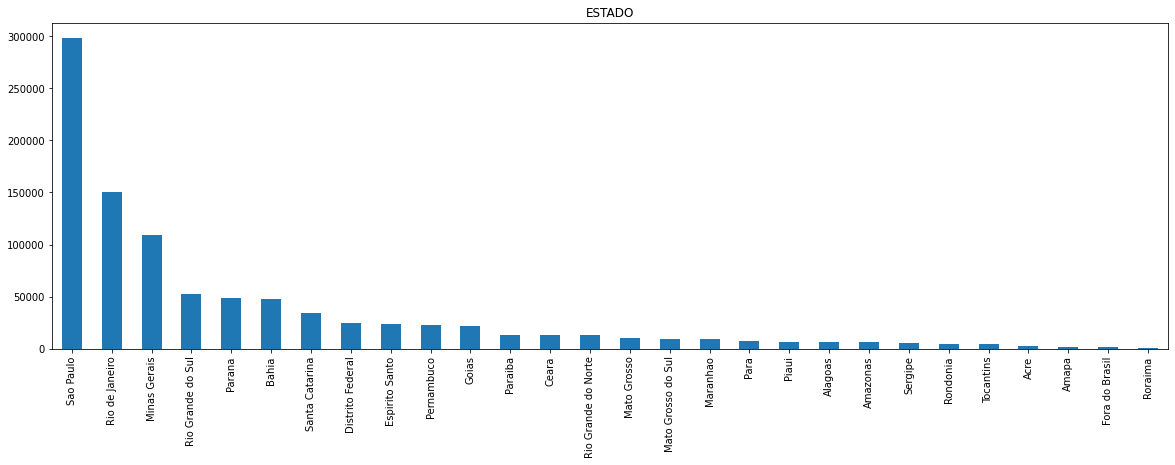

In [134]:
column = 'ESTADO'
df_bem_time[column].value_counts().plot.bar(figsize=(20, 6), title=column)

In [132]:
df_bem_time[column].value_counts(dropna=False).to_frame()

,ESTADO
Sao Paulo,298040
Rio de Janeiro,150608
Minas Gerais,108878
Rio Grande do Sul,52139
Parana,49036
Bahia,47848
Santa Catarina,34581
Distrito Federal,24311
Espirito Santo,23790
Pernambuco,23001


## Time

Total de Times: 29


<AxesSubplot:title={'center':'TIME'}>

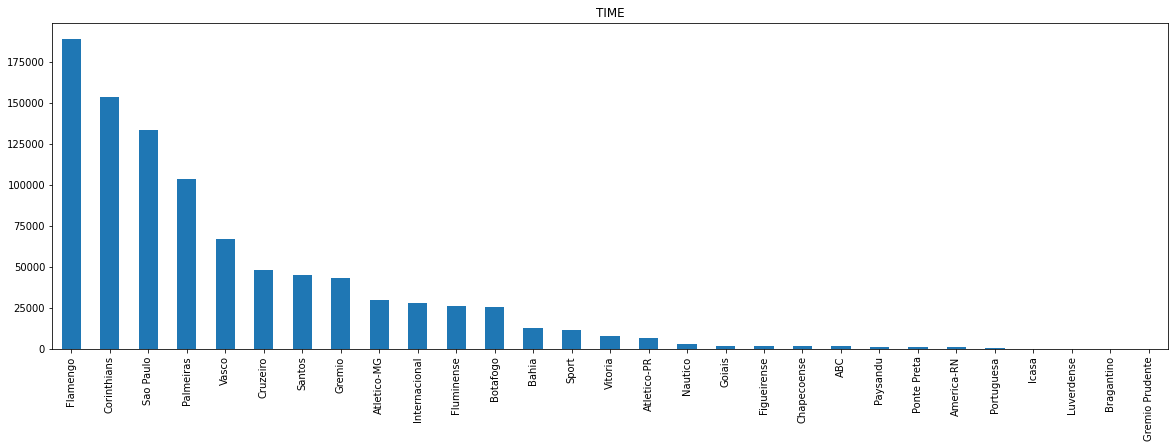

In [140]:
column='TIME'
print('Total de Times:', len(df_bem_time[column].unique()))
df_bem_time[column].value_counts().plot.bar(figsize=(20, 6), title=column)

In [136]:
column='TIME'
df_bem_time[column].value_counts(dropna=False).to_frame()

,TIME
Flamengo,189334
Corinthians,153985
Sao Paulo,133624
Palmeiras,103745
Vasco,67106
Cruzeiro,48067
Santos,45403
Gremio,43627
Atletico-MG,30082
Internacional,28143


# BD_SERVICOS.csv

In [141]:
df_servicos = pd.read_csv(os.path.join(data_path, 'BD_SERVICOS.csv'))
df_servicos

,KEY,GLOBOPLAY,PREMIERE_PLAY,GLOBOSAT_PLAY,COMBATE,CARTOLA_PRO
0,2812202,0,0,0,0,0
1,609314,0,0,0,0,0
2,1837779,0,0,0,0,0
3,950603,0,0,0,0,0
4,2105538,0,0,1,0,0
...,...,...,...,...,...,...
951459,1278011,1,0,1,0,1
951460,2042105,1,0,0,0,1
951461,1898803,1,1,1,0,1
951462,3106291,1,0,1,0,1


In [7]:
df_servicos.describe() # São colunas categóricas de fato

,KEY,GLOBOPLAY,PREMIERE_PLAY,GLOBOSAT_PLAY,COMBATE,CARTOLA_PRO
count,9.514640e+05,951464.000000,951464.000000,951464.000000,951464.000000,951464.000000
mean,1.708691e+06,0.401452,0.185091,0.237106,0.017795,0.154316
std,9.852548e+05,0.490192,0.388371,0.425308,0.132205,0.361251
min,3.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.548928e+05,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.709532e+06,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.562060e+06,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.414422e+06,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

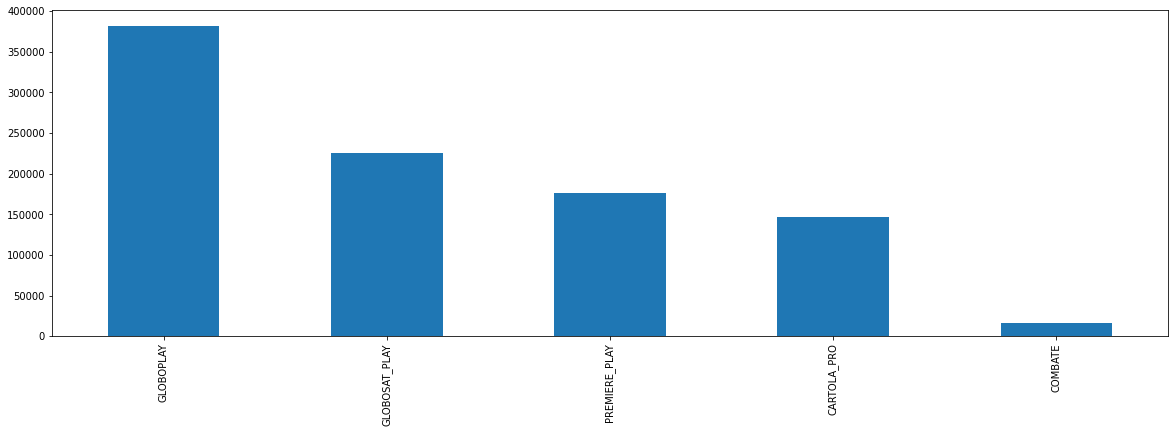

In [166]:
df_servicos.drop(columns=['KEY']).sum().sort_values(ascending=False).plot.bar(figsize=(20, 6))

<AxesSubplot:title={'center':'Número de Serviços por Usuário'}>

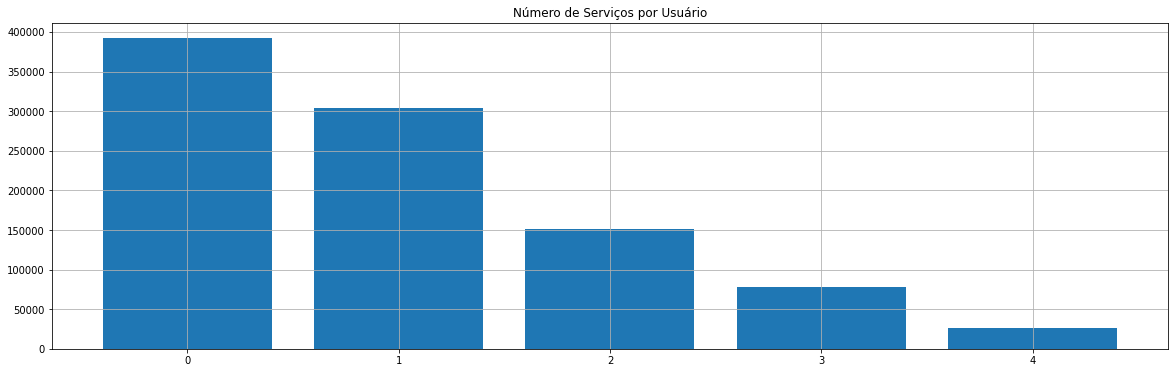

In [165]:
plt.title('Número de Serviços por Usuário')
df_servicos.drop(columns=['KEY']).sum(axis=1).hist(figsize=(20, 6), bins=5, align='left', rwidth=0.8)

# BD_CONSUMO.csv

In [256]:
df_consumo = pd.read_csv(os.path.join(data_path, 'BD_CONSUMO.csv'))
df_consumo = df_consumo.dropna()
df_consumo.shape

(14174706, 3)

In [176]:
df_group_consumo = df_consumo.groupby('KEY')

<AxesSubplot:>

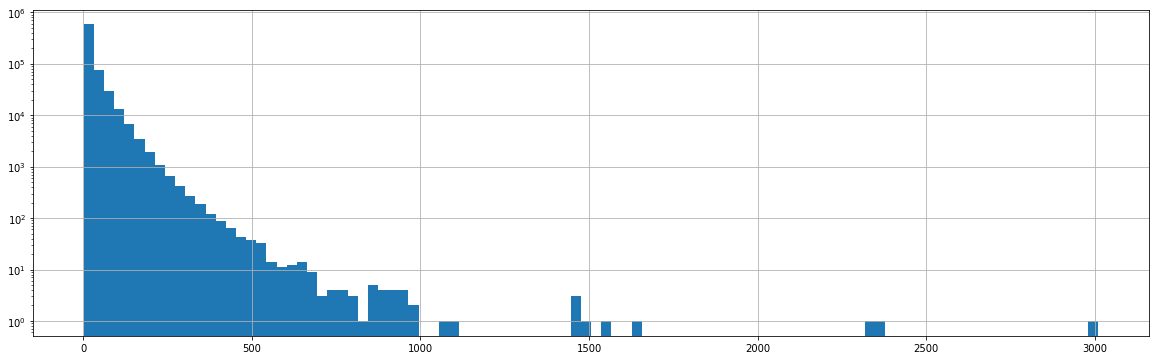

In [206]:
df_group_consumo.count()['tempo'].hist(figsize=(20, 6), bins=100, log=True)

In [207]:
df_group_consumo.count()['tempo'].describe(percentiles=[.25, .5, .75, .9, .95, .99, .999]).round(2).astype(str).to_frame()

,tempo
count,711705.0
mean,19.92
std,35.1
min,1.0
25%,2.0
50%,7.0
75%,23.0
90%,53.0
95%,82.0
99%,161.0


## tempo

<AxesSubplot:>

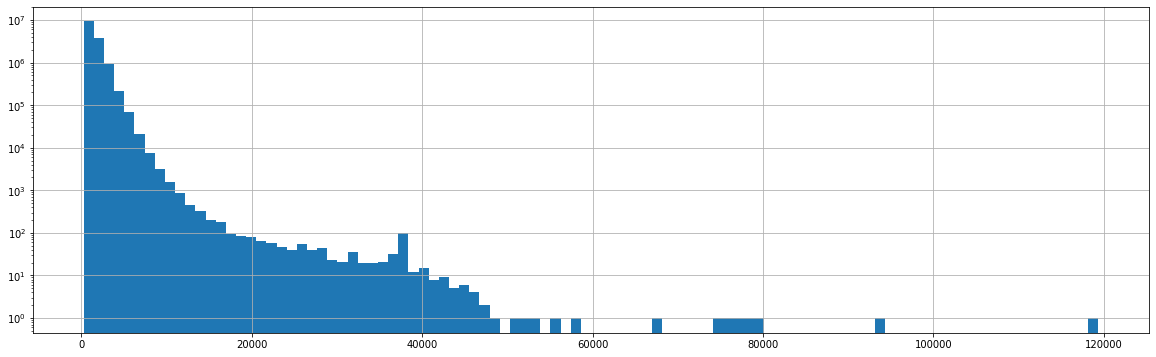

In [191]:
df_consumo['tempo'].hist(figsize=(20, 6), bins=100, log=True)

In [202]:
df_consumo[df_consumo['tempo'] > 7550]

,KEY,tempo,url
1098,1367044,7656.0,https://globoesporte.globo.com/futebol/times/f...
2022,2735619,9209.0,https://globoesporte.globo.com/futebol/times/s...
2372,2226394,7743.0,http://globoesporte.globo.com/sp/santos-e-regi...
3476,3306127,8826.0,https://globoesporte.globo.com/futebol/selecoe...
4829,2079106,9564.0,http://globoesporte.globo.com/ba/futebol/notic...
...,...,...,...
14167280,1980873,7599.0,https://globoesporte.globo.com/ba/futebol/time...
14167899,2695456,8473.0,https://globoesporte.globo.com/mg/futebol/noti...
14169515,1837580,9043.0,https://globoesporte.globo.com/sp/santos-e-reg...
14173108,170879,7732.0,http://globoesporte.globo.com/rs/futebol/times...


In [204]:
df_consumo['tempo'].describe(percentiles=[.25, .5, .75, .9, .95, .99, .999]).round(2).astype(str).to_frame()

,tempo
count,14174706.0
mean,1362.17
std,978.27
min,292.0
25%,726.0
50%,1150.0
75%,1754.0
90%,2561.0
95%,3142.0
99%,4731.0


## links

In [411]:
am = df_consumo[:100000].copy()

In [412]:
# remove o nome do site, pega apenas os argumentos
am['url'] = am['url'].str.split(".com/").str.get(1)

In [413]:
split_futebol = am['url'].str.split("futebol/")

In [414]:
am['url_region'] = split_futebol.str.get(0).str[:-1]

In [415]:
am['url_region'] = am['url_region'].str.split("/").str.get(0)

In [416]:
am.loc[am['url_region'].str.len() > 2, 'url_region'] = None

In [417]:
am.loc[am['url_region'] == '', 'url_region'] = None

In [418]:
split_noticia = split_futebol.str.get(1).str.split("noticia/")

In [419]:
am['url_noticia'] = split_noticia.str.get(1)

In [420]:
am['url_campeonato'] = split_noticia.str.get(0).str.split("times/").str.get(0).str[:-1]

In [ ]:
am.loc[am['url_campeonato'] == '', 'url_campeonato'] = None

In [421]:
am['url_times'] = split_noticia.str.get(0).str.split("times/").str.get(1).str[:-1]

In [423]:
am['url_times'] = am['url_times'].str.split("/").str.get(0)

In [ ]:
am.loc[am['url_times'] == '', 'url_times'] = None

In [436]:
am.drop(columns=['url'], inplace=True)

In [437]:
am

,KEY,tempo,url_region,url_noticia,url_campeonato,url_times
0,1666965,1532.0,mg,diretor-de-futebol-do-atletico-mg-revela-consu...,,siga-atletico-mg
1,2428750,965.0,None,NaN,,botafogo
2,23359,464.0,pb,NaN,campeonato-paraibano,NaN
3,2451676,3286.0,sp,conmebol-abre-investigacao-para-verificar-se-s...,,santos
4,707389,1195.0,None,lateral-da-base-do-palmeiras-releva-chegadas-f...,,palmeiras
...,...,...,...,...,...,...
99995,1547217,1458.0,None,douglas-volta-a-sao-paulo-mancando-e-deve-desf...,,corinthians
99996,2682073,1357.0,None,piris-chega-ao-rio-para-assinar-com-o-flamengo...,,flamengo
99997,2960170,3187.0,None,homens-de-ferro-artilheiro-da-hora-12o-jogador...,brasileirao-serie-a,NaN
99998,1666813,899.0,None,NaN,,flamengo


## url_region

In [392]:
am['url_region'].unique()

array(['mg', None, 'pb', 'sp', 'rj', 'al', 'pr', 'rs', 'sc', 'ce', 'go',
       'ba', 'pe', 'rn', 'df', 'pi', 'am', 'pa', 'ac', 'es', 'ma', 'mt',
       'to', 'se', 'ms', 'ap', 'ro'], dtype=object)

<AxesSubplot:title={'center':'url_region'}>

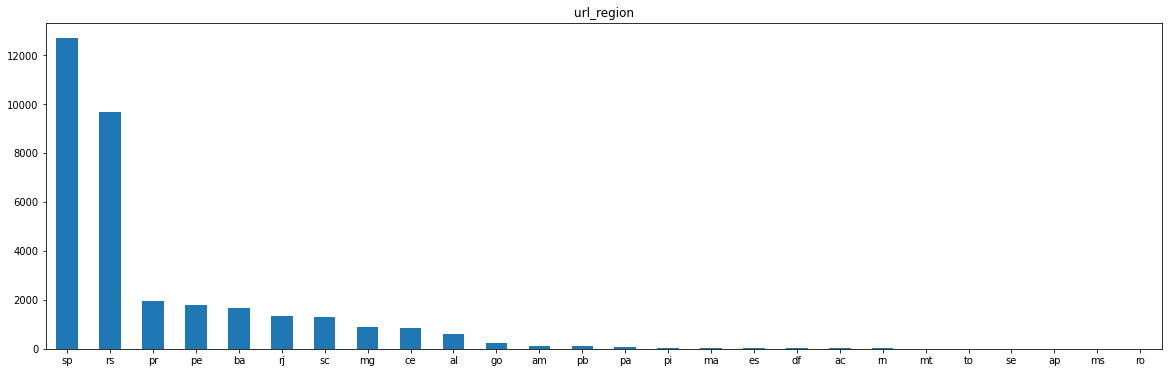

In [398]:
am['url_region'].value_counts().plot.bar(figsize=(20, 6), title='url_region', rot=0)

In [396]:
am['url_region'].value_counts(dropna=False)

NaN    66454
sp     12687
rs      9683
pr      1958
pe      1778
ba      1665
rj      1354
sc      1310
mg       875
ce       839
al       587
go       245
am       129
pb        98
pa        78
pi        53
ma        43
es        38
df        33
ac        31
rn        24
to        12
mt        12
se         7
ap         3
ms         3
ro         1
Name: url_region, dtype: int64

## url_noticia

In [402]:
am['url_noticia'].unique()

array(['diretor-de-futebol-do-atletico-mg-revela-consulta-da-roma-por-maidana.ghtml',
       nan,
       'conmebol-abre-investigacao-para-verificar-se-santos-escalou-sanchez-de-forma-irregular.ghtml',
       ...,
       'mosaico6-festa-tera-cascata-de-papel-picado-bandeiroes-e-efeito-de-quase-360.ghtml',
       'gerson-gusmao-minimiza-jejum-do-operario-pr-e-mira-mata-mata-criamos-gordura.ghtml',
       '2014/11/ceni-fala-do-filho-que-teve-fora-do-casamento-assumi-porque-o-amo.html'],
      dtype=object)

## url_campeonato

In [405]:
am['url_campeonato'].unique()

array(['', 'campeonato-paraibano', 'brasileirao-serie-a', 'libertadores',
       'brasileirao-serie-a/voce-escala/monte-um-time-com-os-destaques-da-primeira-metade-do-campeonato-brasileir',
       'libertadores/raio-x/flamengo-cruzeiro/07-08-2018',
       'copa-do-brasil',
       'brasileirao-serie-a/sabe-tudo-sobre-o-brasileirao',
       'carioca-serie-b1', 'mineiro-modulo-2', nan, 'copa-sul-americana',
       'carioca-serie-c', 'voce-escala/centenario-do-classic',
       'gaucho-segunda-divisao', 'mineiro-segunda-divisao',
       'campeonato-paulista', 'carioca-serie-b2', 'mundial-de-clubes',
       'copa-paulista', 'paulista-segunda-divisao',
       'simulador-do-campeao-brasileiro',
       'campeonato-brasileiro/quem-contratou-melhor-na-janela-internacional',
       'selecoes/uruguai', 'selecoes/argentina',
       'brasileirao-serie-a/selecao-do-campeonato-brasileiro-2016',
       'catarinense-segunda-divisao',
       'copa-do-brasil/ao-vivo/sorteio-copa-do-brasil.ghtm',
       'co

In [443]:
pd.set_option('max_rows', 500)

In [444]:
am[am['url_campeonato'].str.contains('voce-escala')==True]

,KEY,tempo,url_region,url_noticia,url_campeonato,url_times
52,1381177,3822.0,None,NaN,brasileirao-serie-a/voce-escala/monte-um-time-...,NaN
179,1162362,4217.0,None,NaN,brasileirao-serie-a/voce-escala/monte-um-time-...,NaN
235,2359128,965.0,None,NaN,brasileirao-serie-a/voce-escala/monte-um-time-...,NaN
741,2734654,736.0,None,NaN,brasileirao-serie-a/voce-escala/monte-um-time-...,NaN
1092,3034028,1550.0,None,NaN,voce-escala/centenario-do-classic,NaN
1333,2701886,3122.0,None,NaN,brasileirao-serie-a/voce-escala/monte-um-time-...,NaN
1401,208736,466.0,None,NaN,voce-escala/centenario-do-classic,NaN
1463,3350802,856.0,None,NaN,brasileirao-serie-a/voce-escala/monte-um-time-...,NaN
1787,726282,5640.0,None,NaN,brasileirao-serie-a/voce-escala/monte-um-time-...,NaN
1824,90782,464.0,None,NaN,brasileirao-serie-a/voce-escala/monte-um-time-...,NaN


## url_times

In [426]:
am['url_times'].unique()

array(['siga-atletico-mg', 'botafogo', nan, 'santos', 'palmeiras',
       'cruzeiro', 'vasco', 'flamengo', 'atletico-pr', 'gremio',
       'sao-paulo', 'figueirense', 'ceara', 'fluminense', 'corinthians',
       'internacional', 'vila-nova', 'bahia', 'treze', 'santa-cruz',
       'crb', 'atletico-mg', 'londrina', 'vitoria', 'sport',
       'parana-clube', 'nautico', 'chapecoense', 'fortaleza', 'csa',
       'america-mg', 'atletico-go', 'avai', 'sao-bento', 'ponte-preta',
       'botafogo-sp', 'guarani', 'goias', 'coritiba', 'mogi-mirim',
       'paysandu', 'botafogo-pb', 'criciuma', 'remo', 'bragantino',
       'atletico-ac', 'operario-pr', 'sao-francisco', 'sao-mateus',
       'ferroviario', 'sampaio-correa', 'fast', 'juventude', 'tupi',
       'iranduba', 'tupy-es', 'cuiaba', 'brasil-de-pelotas',
       'comercial-sp', 'boa-esporte', 'parana', 'francana', 'moto-club',
       'xv-de-piracicaba', 'ferroviaria', 'olimpia-sp', 'manaus',
       'confianca', 'linhares', 'joinville', 'campi

# Concatenação

In [343]:
_df = df_servicos.set_index('KEY').join(df_bem_time.set_index('KEY'))
_df

,GLOBOPLAY,PREMIERE_PLAY,GLOBOSAT_PLAY,COMBATE,CARTOLA_PRO,SEXO,ESTADO,TIME,IDADE
KEY,,,,,,,,,
2812202,0,0,0,0,0,M,Sao Paulo,Corinthians,25.0
609314,0,0,0,0,0,M,Parana,Palmeiras,23.0
1837779,0,0,0,0,0,M,Rio de Janeiro,Botafogo,30.0
950603,0,0,0,0,0,M,Sao Paulo,Sao Paulo,34.0
2105538,0,0,1,0,0,M,Sao Paulo,Palmeiras,27.0
...,...,...,...,...,...,...,...,...,...
1278011,1,0,1,0,1,M,Sao Paulo,Sao Paulo,24.0
2042105,1,0,0,0,1,M,Sao Paulo,Ponte Preta,37.0
1898803,1,1,1,0,1,M,Rio Grande do Norte,Flamengo,45.0


In [10]:
y_categories = _df['TIME'].astype('category').cat.categories
_df['TIME'] = _df['TIME'].astype('category').cat.codes

In [11]:
dummies_estado = pd.get_dummies(_df['ESTADO'])
_df = pd.concat([_df, dummies_estado], axis=1).drop(columns=['ESTADO'])

In [12]:
_df = _df.drop(columns=['DTA_NASC'])
_df

,GLOBOPLAY,PREMIERE_PLAY,GLOBOSAT_PLAY,COMBATE,CARTOLA_PRO,SEXO,TIME,IDADE,Acre,Alagoas,...,Piaui,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondonia,Roraima,Santa Catarina,Sao Paulo,Sergipe,Tocantins
KEY,,,,,,,,,,,,,,,,,,,,,
2812202,0,0,0,0,0,M,8,25.0,0,0,...,0,0,0,0,0,0,0,1,0,0
609314,0,0,0,0,0,M,20,23.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1837779,0,0,0,0,0,M,5,30.0,0,0,...,0,0,0,1,0,0,0,0,0,0
950603,0,0,0,0,0,M,25,34.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2105538,0,0,1,0,0,M,20,27.0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278011,1,0,1,0,1,M,25,24.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2042105,1,0,0,0,1,M,22,37.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1898803,1,1,1,0,1,M,11,45.0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [13]:
dummies_sexo = pd.get_dummies(_df['SEXO'])
_df = pd.concat([_df, dummies_sexo], axis=1).drop(columns=['SEXO'])
_df

,GLOBOPLAY,PREMIERE_PLAY,GLOBOSAT_PLAY,COMBATE,CARTOLA_PRO,TIME,IDADE,Acre,Alagoas,Amapa,...,Rondonia,Roraima,Santa Catarina,Sao Paulo,Sergipe,Tocantins,F,M,N,O
KEY,,,,,,,,,,,,,,,,,,,,,
2812202,0,0,0,0,0,8,25.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
609314,0,0,0,0,0,20,23.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1837779,0,0,0,0,0,5,30.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
950603,0,0,0,0,0,25,34.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2105538,0,0,1,0,0,20,27.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278011,1,0,1,0,1,25,24.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2042105,1,0,0,0,1,22,37.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1898803,1,1,1,0,1,11,45.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
target_column = 'TIME'
X, y = _df.drop(columns=[target_column]), _df[target_column]

In [15]:
X = X.drop(columns=['IDADE']) # Tem nulos
# Uma opção seria colocar os valores não conhecidos e nulos para um valor negativo, ex: -1
# outra solução é simplesmente ignorar a coluna de idade, vale um teste.

In [16]:
X.shape, X.dropna().shape

((951464, 38), (951464, 38))

In [103]:
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [107]:
clf = make_pipeline(StandardScaler(), LinearSVC(C=0.1))
clf.fit(X_train[:10000], y_train[:10000])

/Users/Betine/anaconda3/envs/Globo_Case/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=0.1))])

In [108]:
y_pred = clf.predict(X_test)
print('ACC:', accuracy_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred, average='weighted'))

ACC: 0.3775335929330033
F1: 0.25521373759262317


<AxesSubplot:title={'center':'Matriz de Confusão Normalizada'}>

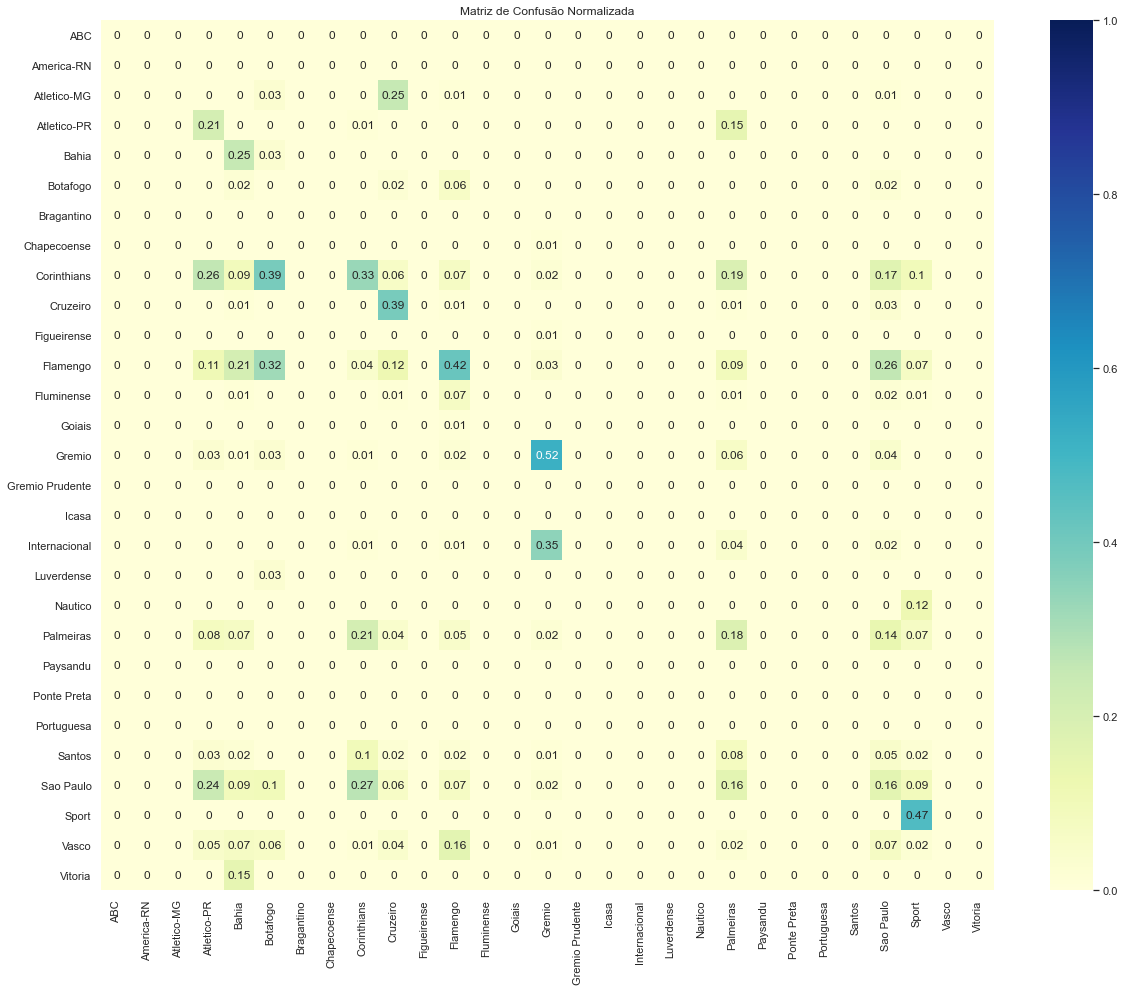

In [112]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(np.round(cnf_matrix/(cnf_matrix.sum(axis=0)+1e-7), 2), index = y_categories,
                  columns = y_categories)
plt.figure(figsize = (20, 16))
plt.title('Matriz de Confusão Normalizada')
sn.heatmap(df_cm, annot=True, vmin=0, vmax=1, cmap="YlGnBu")

## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)